In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12,8
pd.set_option('display.max_column', 1000)
from sklearn.metrics import mean_squared_error

In [124]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [125]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

* Data Description id - Integer unique id of each movie

* belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

* budget:Budget of a movie in dollars. 0 values mean unknown.

* genres : Contains all the Genres Name & TMDB Id in JSON Format

* homepage - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/ , this is the homepage of Whiplash movie.

* imdb_id - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/

* original_language - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.

* original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

* overview - Brief description of the movie.

* popularity - Popularity of the movie in float.

* poster_path - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/

* production_companies - All production company name and TMDB id in JSON format of a movie.

* production_countries - Two digit code and full name of the production company in JSON format.

* release_date - Release date of a movie in mm/dd/yy format.

* runtime - Total runtime of a movie in minutes (Integer).

* spoken_languages - Two digit code and full name of the spoken language.

* status - Is the movie released or rumored?

* tagline - Tagline of a movie

* title - English title of a movie

* Keywords - TMDB Id and name of all the keywords in JSON format.

* cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

* crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

* revenue - Total revenue earned by a movie in dollars.

# E.D.A

In [126]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [127]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [128]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt3321300,en,The Gift,"In the Pacific Northwest during the 1950s, two...",NaN,/9DIf9DsULGzQX5vcohwRzbZWhHa.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Gift,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe45e29251416c91041af9', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [129]:
test.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
count,4398.000000,877,4.398000e+03,4382,1420,4398,4398,4398,4384,4398.000000,4397,4140,4296,4397,4394.000000,4356,4396,3535,4395,4005,4385,4376
unique,NaN,556,NaN,1101,1402,4398,39,4353,4383,NaN,4397,3366,458,3289,NaN,526,3,3529,4342,3885,4365,4376
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.missionimpossible.com/,tt0120741,en,Carrie,No overview found.,NaN,/9sMmihRqqeM6abnINWuxkX4Olpo.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/9/11,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You never forget your first love.,The Rookie,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '52fe421ac3a36847f80042fb', 'de..."
freq,NaN,10,NaN,348,3,1,3776,2,2,NaN,1,72,2587,7,NaN,2704,4389,2,2,30,21,1
mean,5199.500000,NaN,2.264929e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.550230,NaN,NaN,NaN,NaN,107.622212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1269.737571,NaN,3.689991e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.209014,NaN,NaN,NaN,NaN,21.058290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3001.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4100.250000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.895186,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5199.500000,NaN,7.450000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.482241,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6298.750000,NaN,2.800000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.938524,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count of missing values in each column in train:

In [130]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [131]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

Plot Budget vs Revenue.

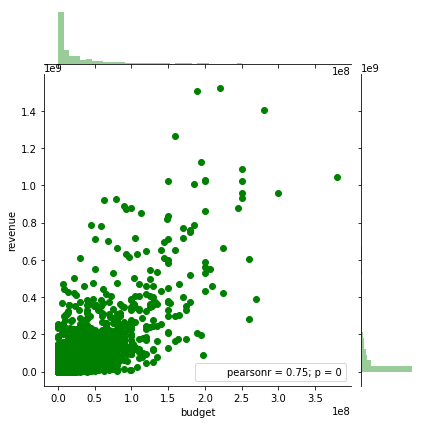

In [132]:
sns.jointplot(x="budget", y="revenue", data=train, color="g")
plt.show()

Plot popularity vs revenue

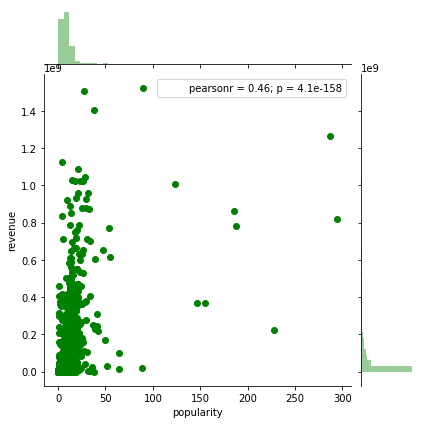

In [133]:
sns.jointplot('popularity', 'revenue', data=train, color='g')

Plot runtime vs revenue

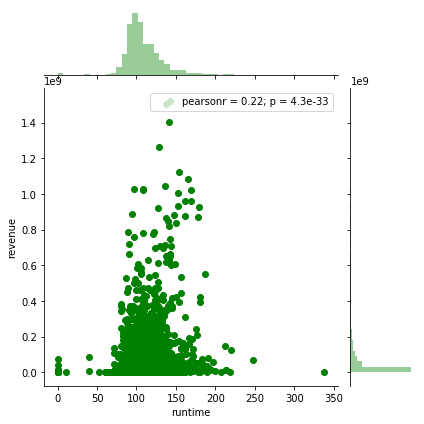

In [134]:
sns.jointplot(x="runtime", y="revenue", data=train, ratio=4, color="g")
plt.show()

# Revenue (Target Variable) Distribution

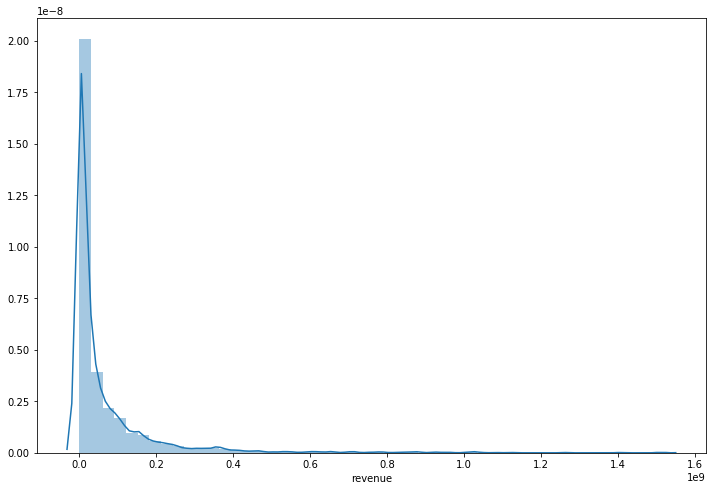

In [135]:
sns.distplot(train.revenue)

In [136]:
train.revenue.describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

Because revenue variable is skewed, let's calculate log of it.

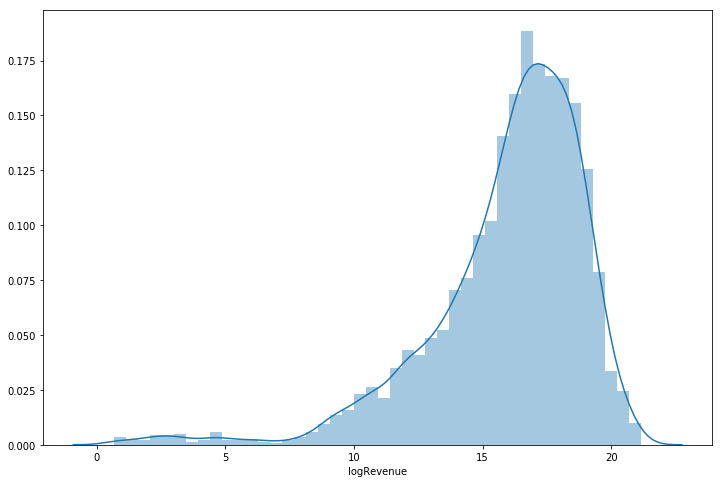

In [137]:
train['logRevenue'] = np.log1p(train['revenue'])
sns.distplot(train['logRevenue'])

Get Month, Day Year, Week day, quarter from release date

In [138]:
train[['release_month', 'release_day', 'release_year']] = train['release_date'].str.split('/', expand=True).replace(np.nan, -1).astype(int)

train.loc[(train['release_year'] <= 19) & (train['release_year'] < 100), 'release_year'] += 2000
train.loc[(train['release_year'] > 19) & (train['release_year'] < 100), 'release_year'] += 1900

releaseDate = pd.to_datetime(train['release_date'])
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

Plot Release Year Count

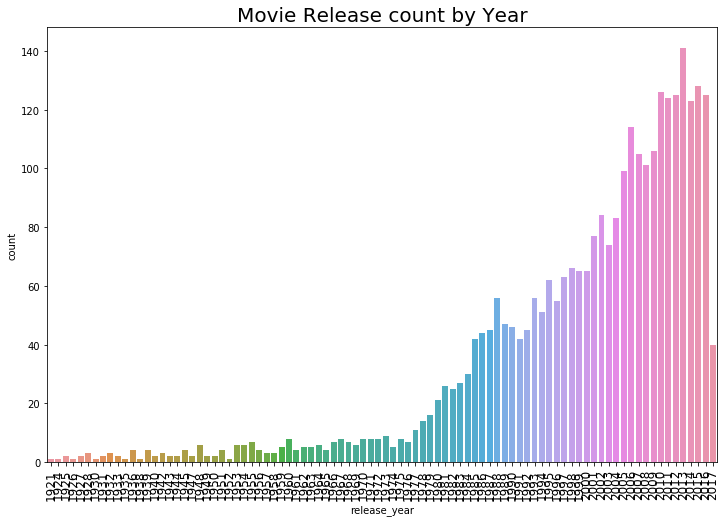

In [139]:
sns.countplot(train['release_year'].sort_values())
plt.title("Movie Release count by Year", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

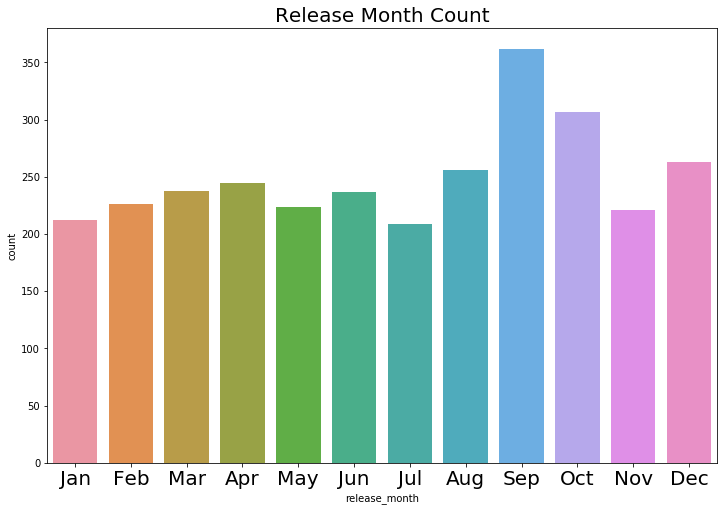

In [140]:
sns.countplot(train['release_month'].sort_values())
plt.title('Release Month Count', fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                   'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(loc, labels, fontsize=20)
plt.show()

Plot release day count

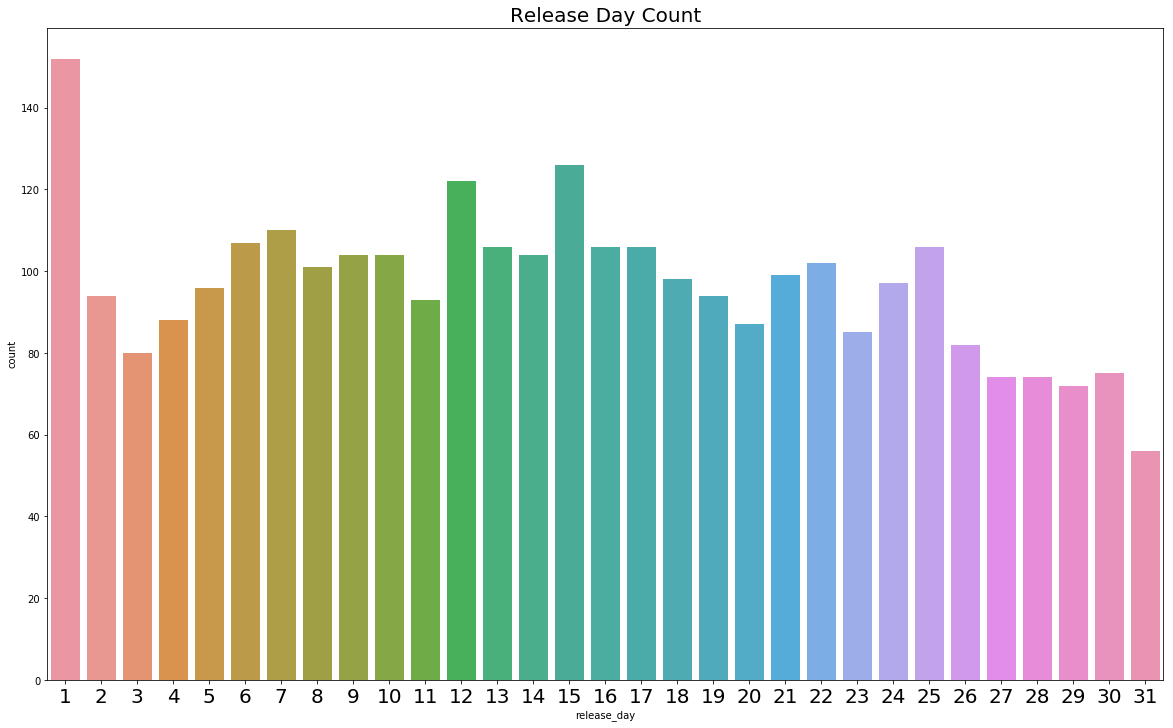

In [141]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_day'].sort_values())
plt.title("Release Day Count",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

Plot Release Day of Week

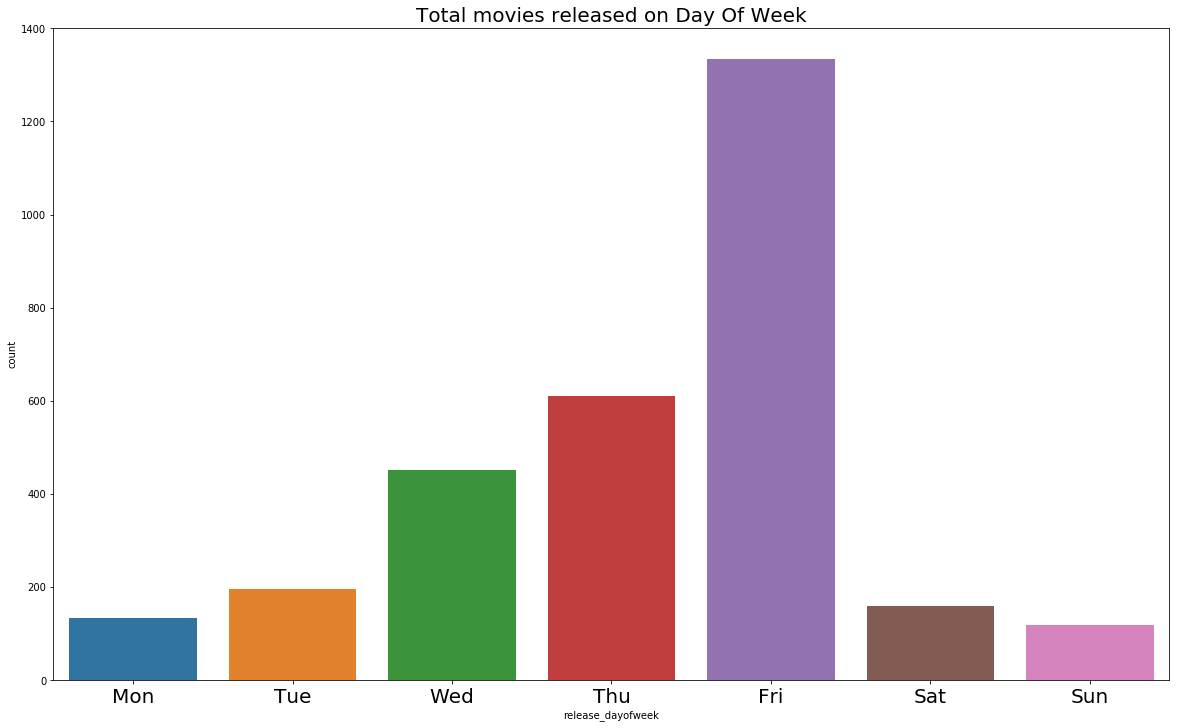

In [142]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

Plot release quater Count

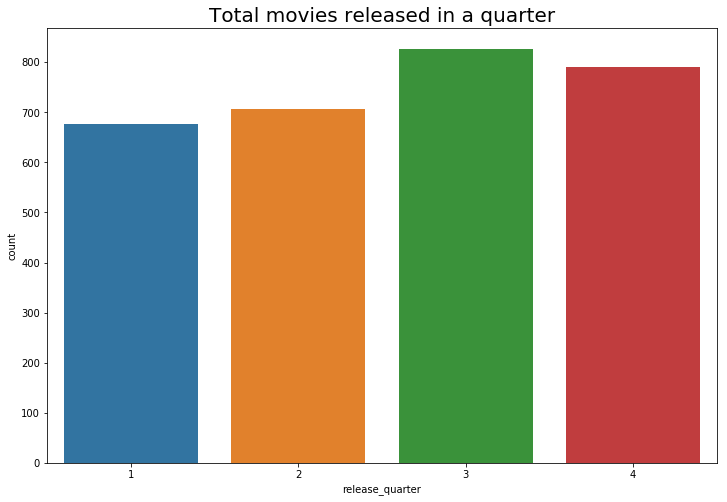

In [143]:
sns.countplot(train['release_quarter'].sort_values())
plt.title("Total movies released in a quarter",fontsize=20)
plt.show()

Plot Release Year vs Revenue

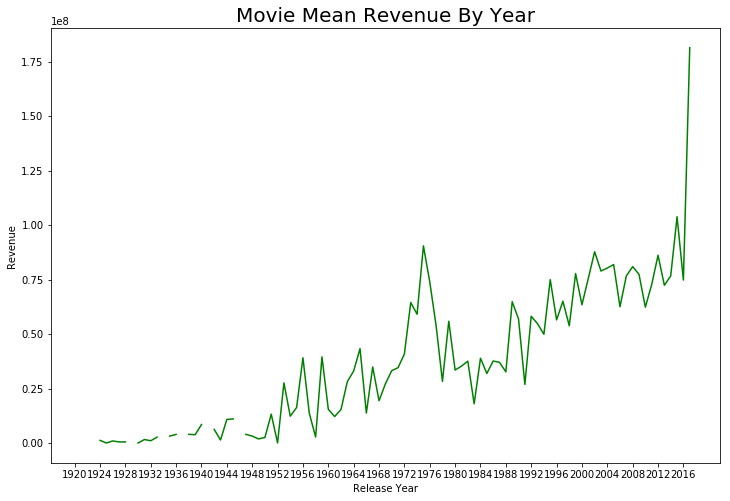

In [144]:
train['meanRevenueByYear'] = train.groupby('release_year')['revenue'].aggregate('mean')
train['meanRevenueByYear'].plot(color='g')
plt.xticks(np.arange(1920, 2018, 4))
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Movie Mean Revenue By Year', fontsize=20)
plt.show()

Release Month Vs Revenue Plot

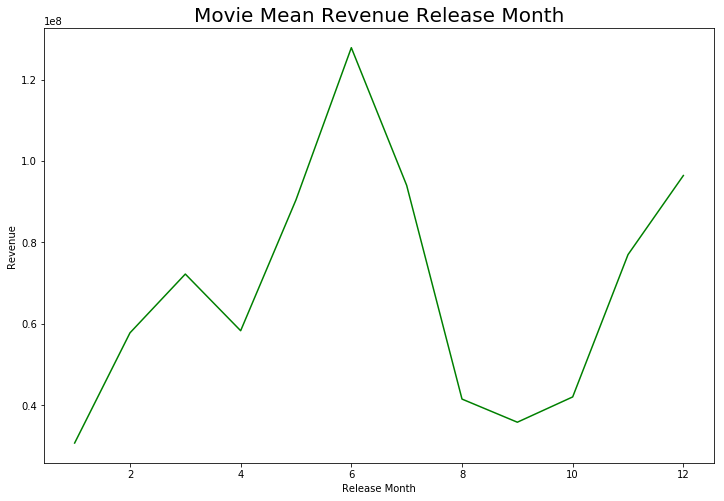

In [145]:
train['meanRevenueByMonth'] = train.groupby('release_month')['revenue'].aggregate('mean')
train['meanRevenueByMonth'].plot(color='g')
plt.xlabel('Release Month')
plt.ylabel('Revenue')
plt.title('Movie Mean Revenue Release Month', fontsize=20)
plt.show()

Release day of week vs Revenue

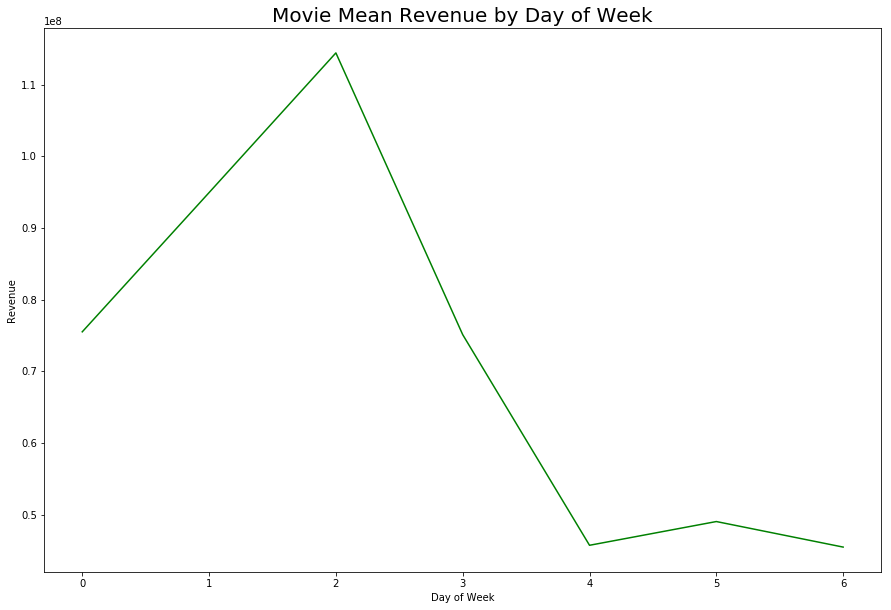

In [146]:
train['meanRevenueByDayOfWeek'] = train.groupby("release_dayofweek")["revenue"].aggregate('mean')
train['meanRevenueByDayOfWeek'].plot(figsize=(15,10),color="g")
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue by Day of Week",fontsize=20)
plt.show()

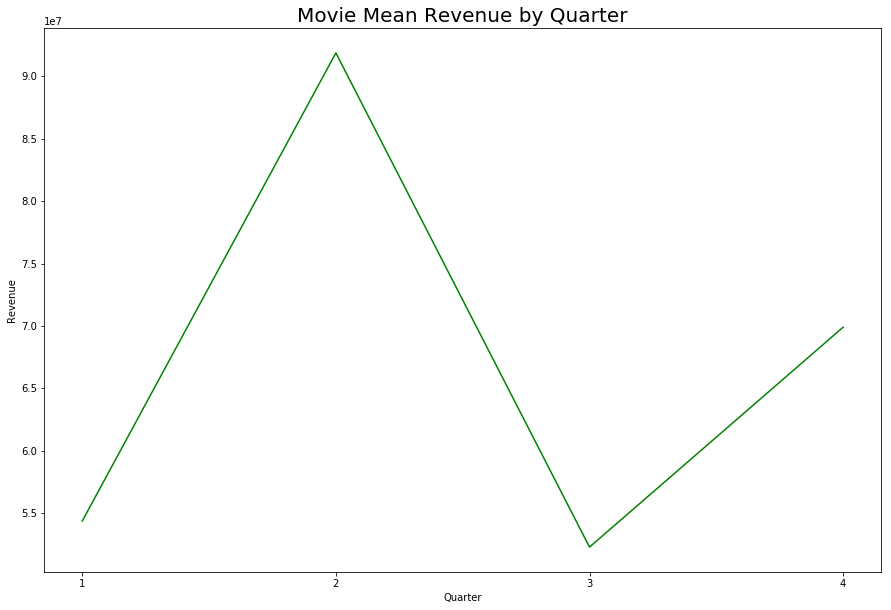

In [147]:
train['meanRevenueByQuarter'] = train.groupby("release_quarter")["revenue"].aggregate('mean')
train['meanRevenueByQuarter'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1,5,1))
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue by Quarter",fontsize=20)
plt.show()

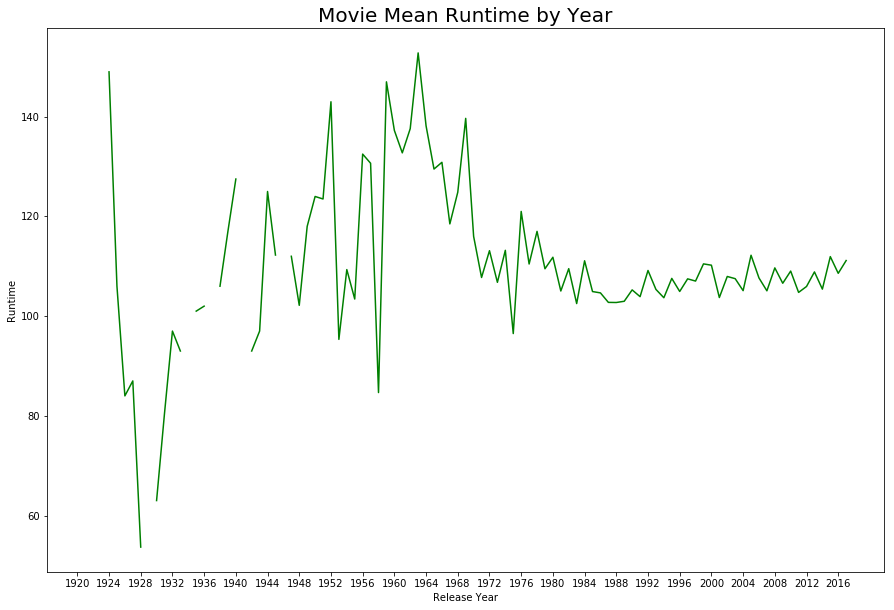

In [148]:
train['meanruntimeByYear'] = train.groupby("release_year")["runtime"].aggregate('mean')
train['meanruntimeByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Runtime")
plt.title("Movie Mean Runtime by Year",fontsize=20)
plt.show()

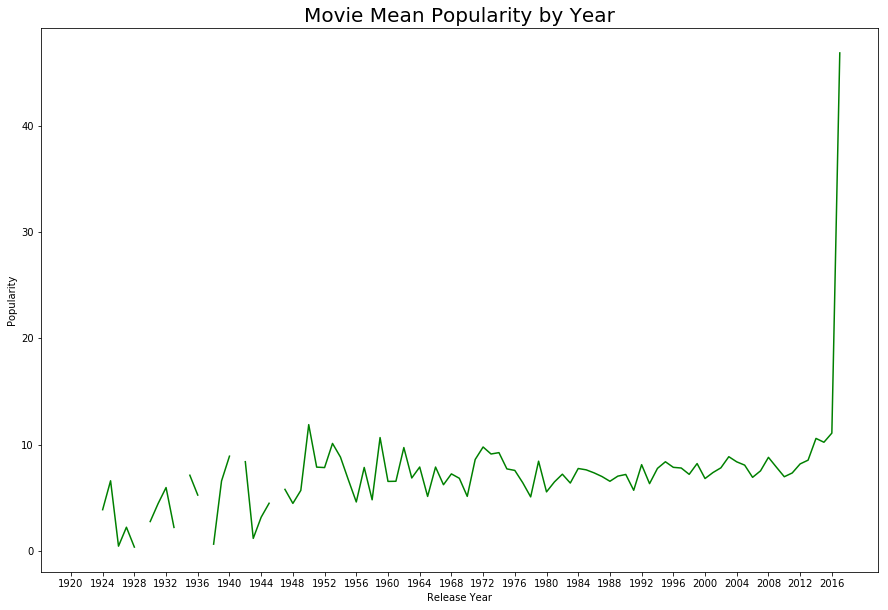

In [149]:
train['meanPopularityByYear'] = train.groupby("release_year")["popularity"].aggregate('mean')
train['meanPopularityByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.title("Movie Mean Popularity by Year",fontsize=20)
plt.show()

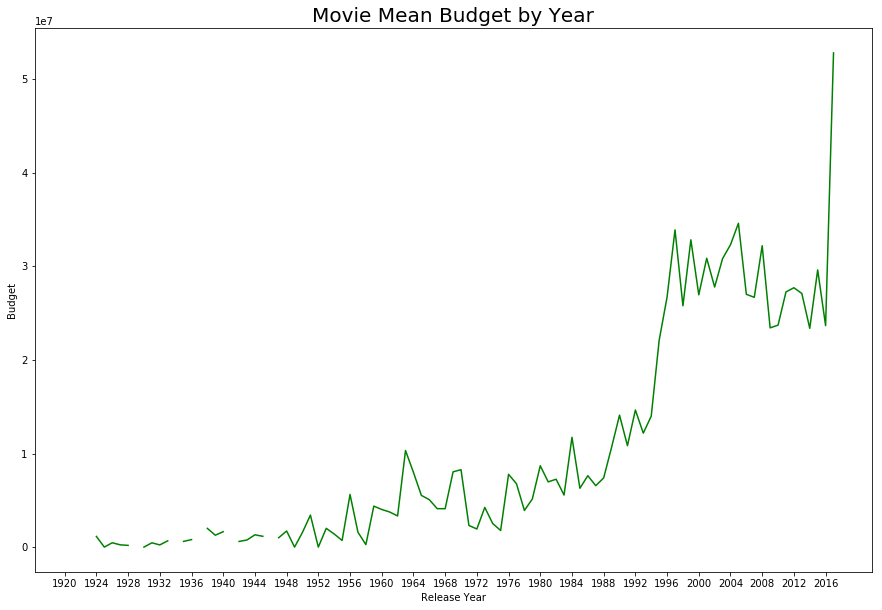

In [150]:
train['meanBudgetByYear'] = train.groupby("release_year")["budget"].aggregate('mean')
train['meanBudgetByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Budget")
plt.title("Movie Mean Budget by Year",fontsize=20)
plt.show()

In [151]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
train['genres'] = train['genres'].map(lambda x: sorted([d['name'] for
    d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

In [152]:
genres = train.genres.str.get_dummies(sep=',')
train = pd.concat([train, genres], axis=1)
print("Action Genres Movie           ", train[train.Action == 1].shape[0])
print("Adventure Genres Movie        ", train[train.Adventure == 1].shape[0])
print("Animation Genres Movie        ", train[train.Animation == 1].shape[0])
print("Comedy Genres Movie           ", train[train.Comedy == 1].shape[0])
print("Crime Genres Movie            ", train[train.Crime == 1].shape[0])
print("Documentary Genres Movie      ", train[train.Documentary == 1].shape[0])
print("Drama Genres Movie            ", train[train.Drama == 1].shape[0])
print("Family Genres Movie           ", train[train.Family == 1].shape[0])
print("Fantasy Genres Movie          ", train[train.Fantasy == 1].shape[0])
print("Foreign Genres Movie          ", train[train.Foreign == 1].shape[0])
print("History Genres Movie          ", train[train.History == 1].shape[0])
print("Music Genres Movie            ", train[train.Music == 1].shape[0])
print("Mystery Genres Movie          ", train[train.Mystery == 1].shape[0])
print("Romance Genres Movie          ", train[train.Romance == 1].shape[0])
print("Science Fiction Genres Movie  ", train[train['Science Fiction'] == 1].shape[0])
print("TV Movie Genres Movie         ", train[train['TV Movie'] == 1].shape[0])
print("Thriller Genres Movie         ", train[train.Thriller == 1].shape[0])
print("War Genres Movie              ", train[train.War == 1].shape[0])
print("Western Genres Movie          ", train[train.Western == 1].shape[0])

Action Genres Movie            741
Adventure Genres Movie         439
Animation Genres Movie         141
Comedy Genres Movie            1028
Crime Genres Movie             469
Documentary Genres Movie       87
Drama Genres Movie             1531
Family Genres Movie            260
Fantasy Genres Movie           232
Foreign Genres Movie           31
History Genres Movie           132
Music Genres Movie             100
Mystery Genres Movie           225
Romance Genres Movie           571
Science Fiction Genres Movie   290
TV Movie Genres Movie          1
Thriller Genres Movie          789
War Genres Movie               100
Western Genres Movie           43


In [153]:
test = test
test['genres'] = test['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = test.genres.str.get_dummies(sep=',')
test = pd.concat([test, genres], axis=1)
print("Action Genres Movie           ", test[test.Action == 1].shape[0])
print("Adventure Genres Movie        ", test[test.Adventure == 1].shape[0])
print("Animation Genres Movie        ", test[test.Animation == 1].shape[0])
print("Comedy Genres Movie           ", test[test.Comedy == 1].shape[0])
print("Crime Genres Movie            ", test[test.Crime == 1].shape[0])
print("Documentary Genres Movie      ", test[test.Documentary == 1].shape[0])
print("Drama Genres Movie            ", test[test.Drama == 1].shape[0])
print("Family Genres Movie           ", test[test.Family == 1].shape[0])
print("Fantasy Genres Movie          ", test[test.Fantasy == 1].shape[0])
print("Foreign Genres Movie          ", test[test.Foreign == 1].shape[0])
print("History Genres Movie          ", test[test.History == 1].shape[0])
print("Music Genres Movie            ", test[test.Music == 1].shape[0])
print("Mystery Genres Movie          ", test[test.Mystery == 1].shape[0])
print("Romance Genres Movie          ", test[test.Romance == 1].shape[0])
print("Science Fiction Genres Movie  ", test[test['Science Fiction'] == 1].shape[0])
print("TV Movie Genres Movie          0")
print("Thriller Genres Movie         ", test[test.Thriller == 1].shape[0])
print("War Genres Movie              ", test[test.War == 1].shape[0])
print("Western Genres Movie          ", test[test.Western == 1].shape[0])

Action Genres Movie            994
Adventure Genres Movie         677
Animation Genres Movie         241
Comedy Genres Movie            1577
Crime Genres Movie             615
Documentary Genres Movie       134
Drama Genres Movie             2145
Family Genres Movie            415
Fantasy Genres Movie           396
Foreign Genres Movie           53
History Genres Movie           163
Music Genres Movie             167
Mystery Genres Movie           325
Romance Genres Movie           864
Science Fiction Genres Movie   454
TV Movie Genres Movie          0
Thriller Genres Movie          1080
War Genres Movie               143
Western Genres Movie           74


Original Language Count

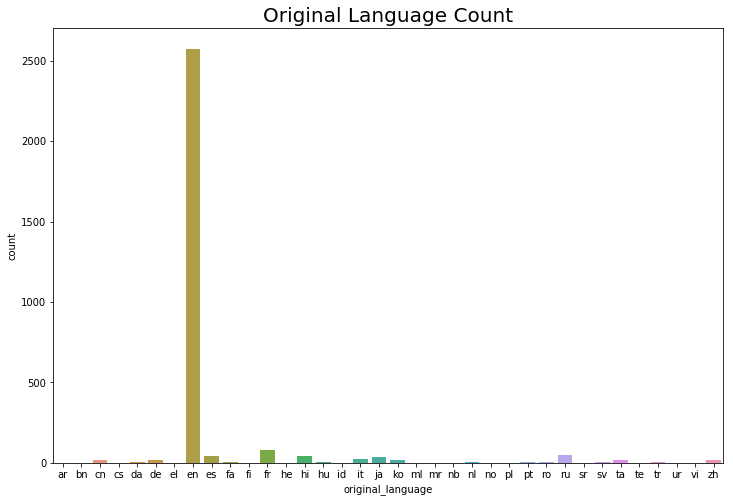

In [154]:
sns.countplot(train['original_language'].sort_values())
plt.title('Original Language Count', fontsize=20)
plt.show()

2996 Movies released in Train and 4 Movies are yet to release.

In [155]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

This is strange, movie is yet to release and revenue is already given.

In [156]:
train.loc[train['status'] == "Rumored"][['status','revenue']]

,status,revenue
609,Rumored,273644
1007,Rumored,60
1216,Rumored,13418091
1618,Rumored,229000


4389 movies released in test data, 7 are yet to release.

In [157]:
test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

How many movies have a homepage?

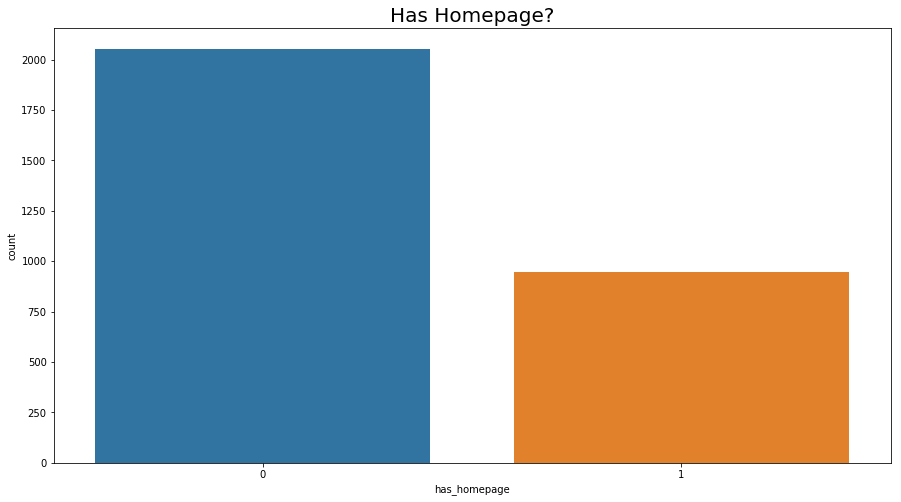

In [158]:
train['has_homepage'] = 1
train.loc[pd.isnull(train['homepage']) ,"has_homepage"] = 0
plt.figure(figsize=(15,8))
sns.countplot(train['has_homepage'].sort_values())
plt.title("Has Homepage?",fontsize=20)
plt.show()

Correlation between has_homepage variable and revenue

Text(0.5,1,'Revenue of movies with and without homepage')

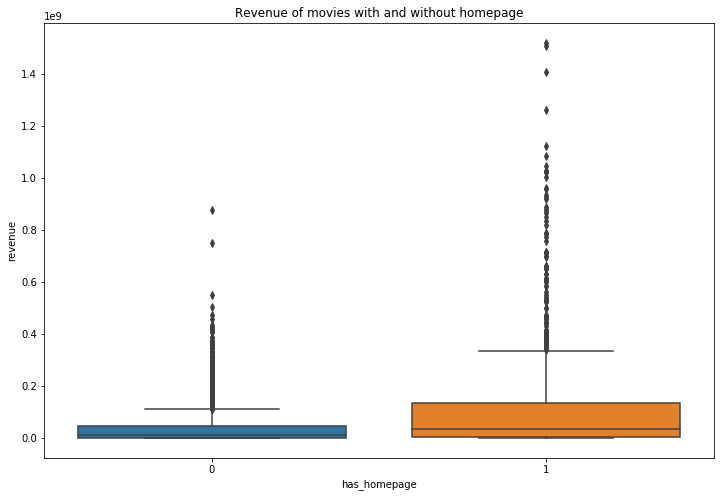

In [159]:
sns.boxplot(x='has_homepage', y='revenue', data=train)
plt.title('Revenue of movies with and without homepage')

Text(0.5,1,'Revenue of movies with and without a tagline')

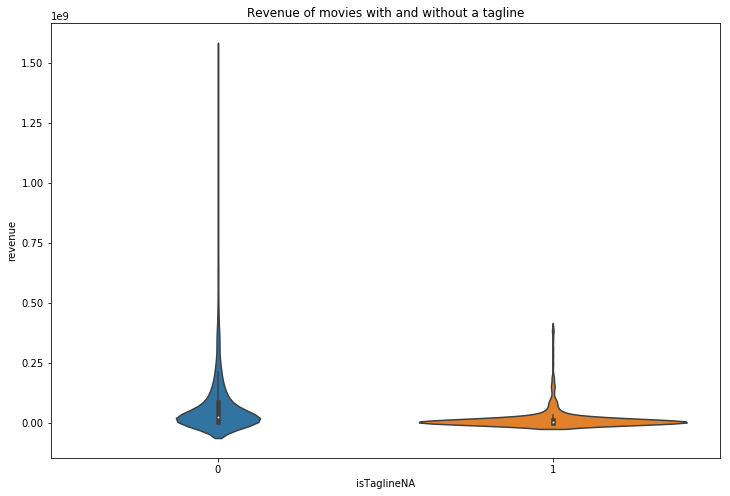

In [160]:
train['isTaglineNA'] = 0
train.loc[pd.isnull(train['tagline']) ,"isTaglineNA"] = 1
sns.violinplot(x="isTaglineNA", y="revenue", data=train)
plt.title('Revenue of movies with and without a tagline')

# Let's Explore External Data

In [161]:
trainAdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv')
testAdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv')

train = pd.merge(train, trainAdditionalFeatures, how='left', on = ['imdb_id'])
test = pd.merge(test, testAdditionalFeatures, how='left', on ='imdb_id')

Missing Values

In [162]:
print("Missing rating in Train set", train['rating'].isnull().sum())
print("Missing total Votes in Train set", train['totalVotes'].isna().sum())
print("")
print("Missing rating in Test set", test['rating'].isna().sum())
print("Missing total Votes in Test set", test['totalVotes'].isna().sum())

Missing rating in Train set 118
Missing total Votes in Train set 118

Missing rating in Test set 179
Missing total Votes in Test set 179


Fill Missing Rating & Total Votes

Note: Actually, I downloaded the data from my website's database: MoviesRE.com . Before few months, I deleted movies with less than 10 votes or 2.1 rating. So probably around 80% of the missing rows will have less than 10 votes or 2.1 rating. So let's fill them with 1.5 and 6

In [163]:
train['rating'] = train['rating'].fillna(1.5)
train['totalVotes'].fillna(6, inplace=True)

test['rating'].fillna(1.5,inplace=True)
test['totalVotes'].fillna(6, inplace=True)

Train set Rating Count

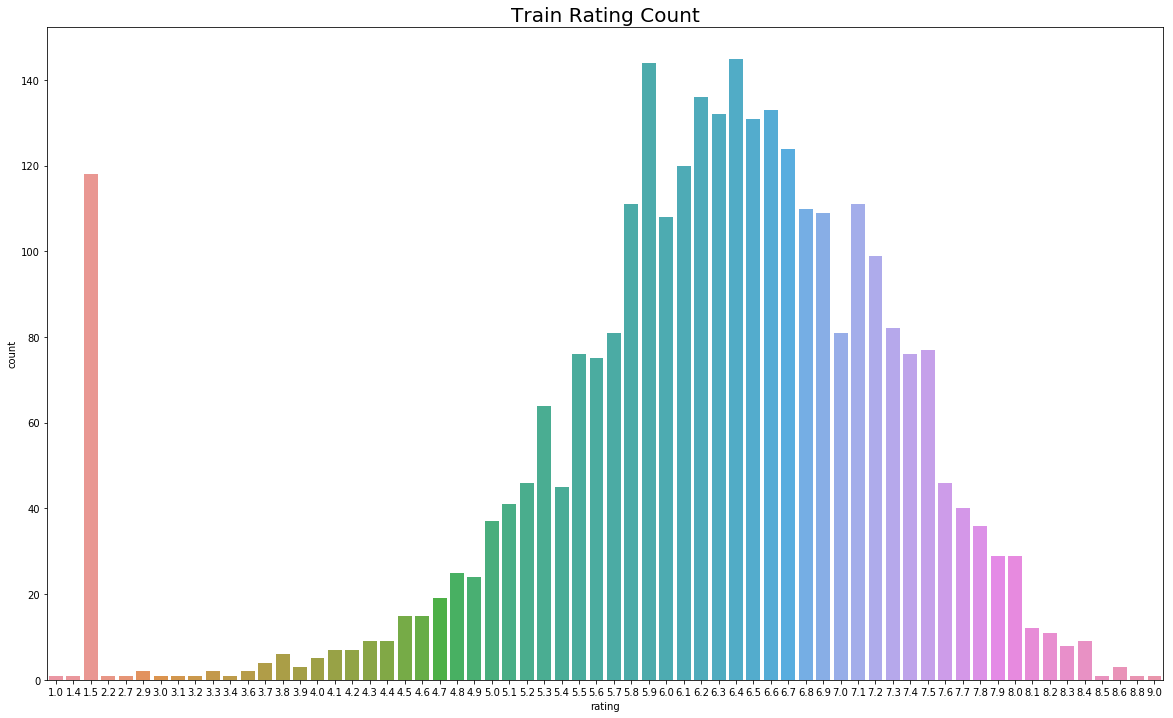

In [164]:
plt.figure(figsize=(20,12))
sns.countplot(train['rating'].sort_values())
plt.title("Train Rating Count",fontsize=20)
plt.show()

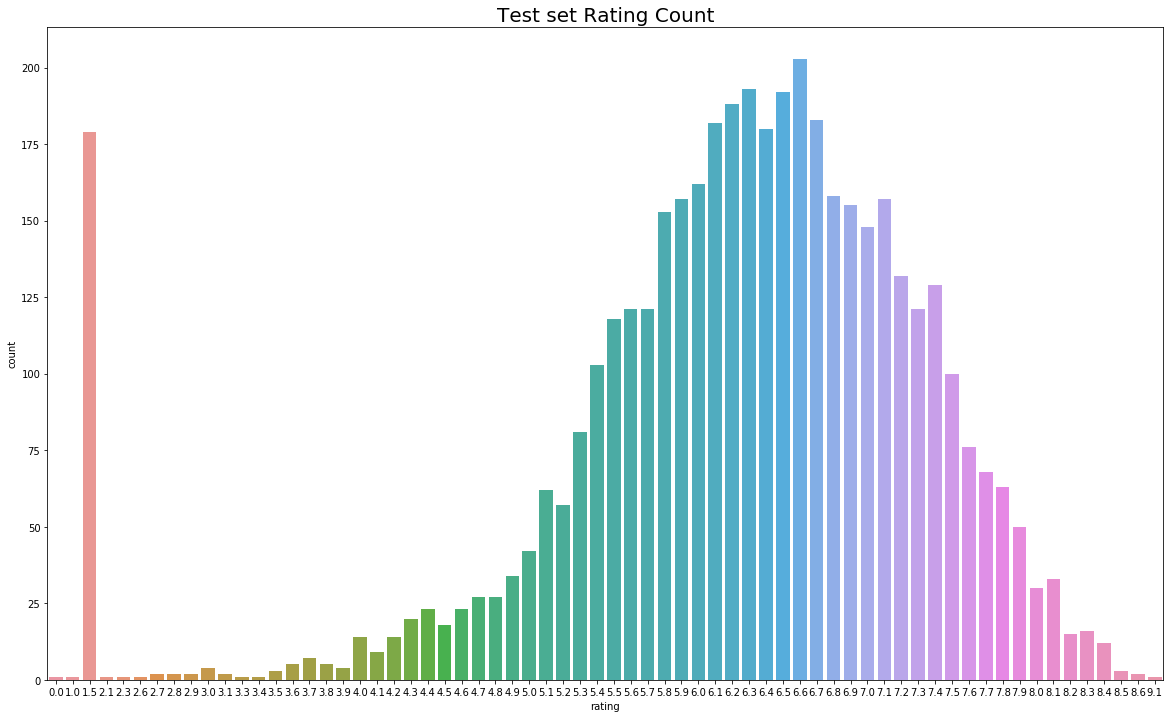

In [165]:
plt.figure(figsize=(20,12))
sns.countplot(test['rating'].sort_values())
plt.title("Test set Rating Count",fontsize=20)
plt.show()

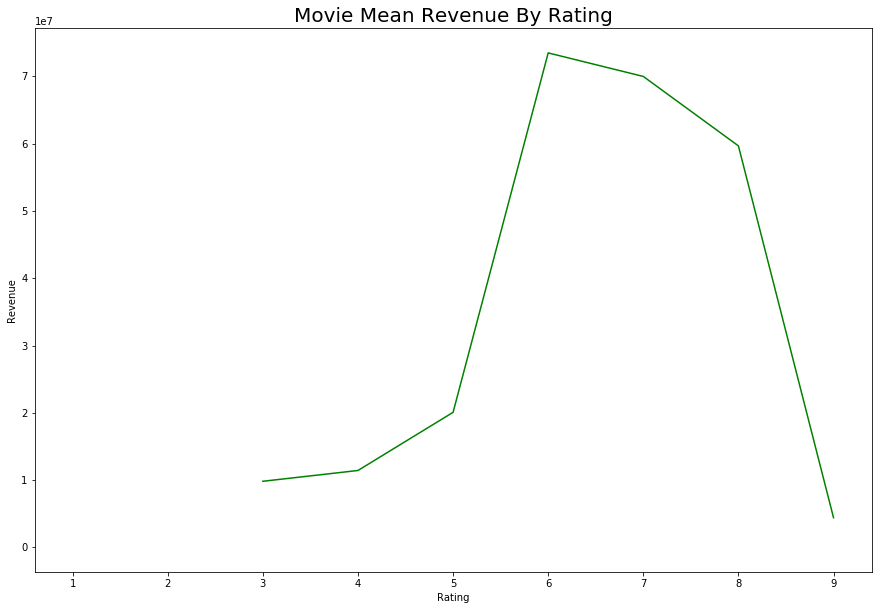

In [166]:
train['meanRevenueByRating'] = train.groupby('rating')['revenue'].aggregate('mean')
train['meanRevenueByRating'].plot(figsize=(15,10), color='g')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.title('Movie Mean Revenue By Rating', fontsize=20)
plt.show()

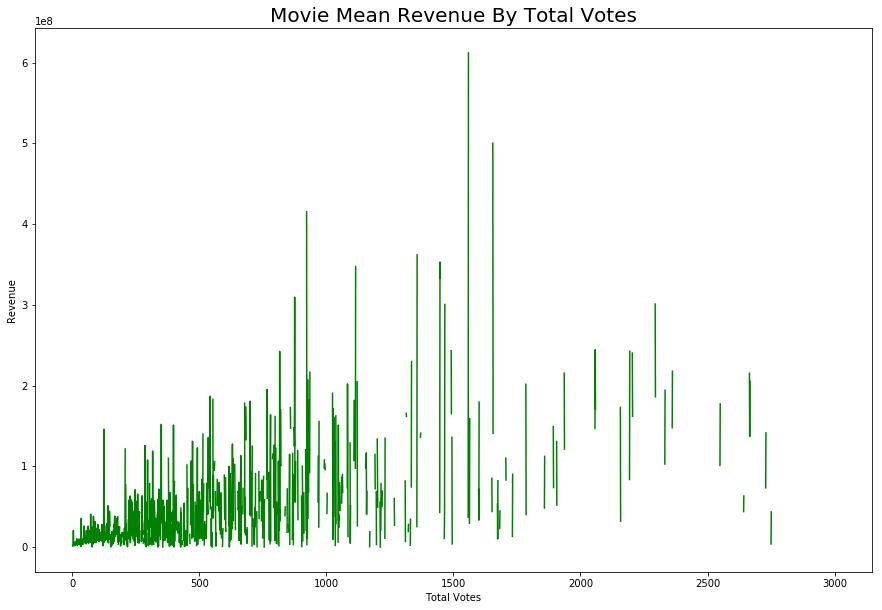

In [167]:
train['meanRevenueByTotalVotes'] = train.groupby("totalVotes")["revenue"].aggregate('mean')
train['meanRevenueByTotalVotes'].plot(figsize=(15,10),color="g")
plt.xlabel("Total Votes")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Total Votes",fontsize=20)
plt.show()

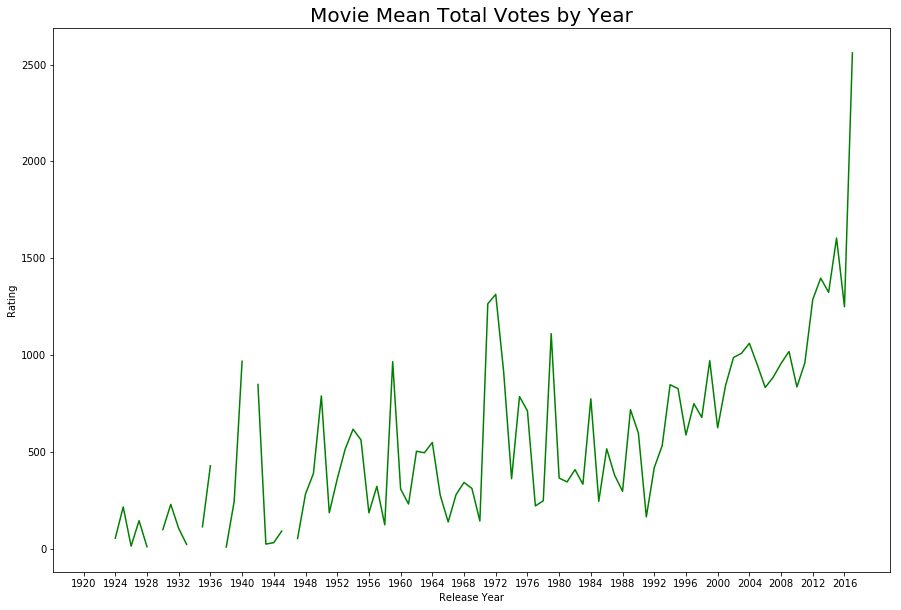

In [168]:
train['meantotalVotesByYear'] = train.groupby("release_year")["totalVotes"].aggregate('mean')
train['meantotalVotesByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Rating")
plt.title("Movie Mean Total Votes by Year",fontsize=20)
plt.show()

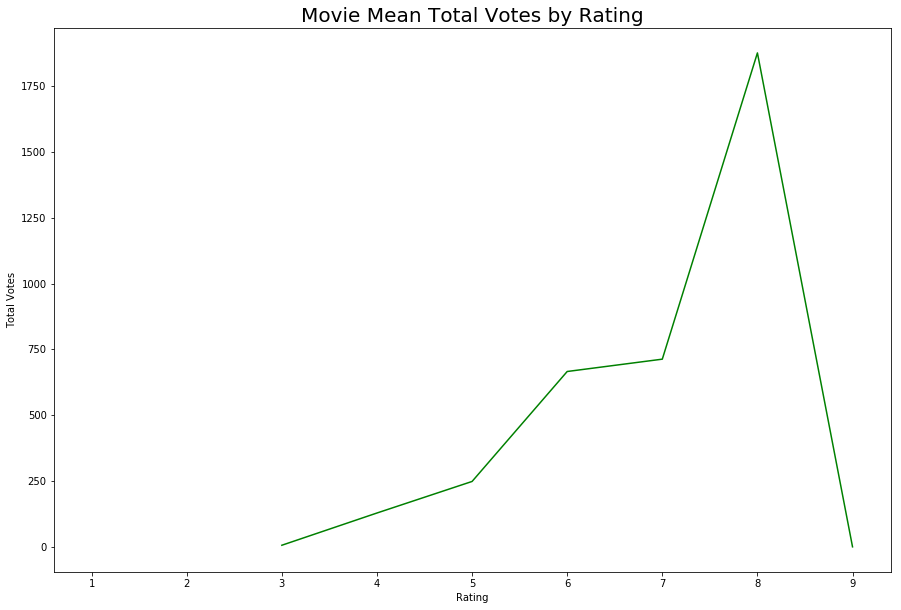

In [169]:
train['meanTotalVotesByRating'] = train.groupby("rating")["totalVotes"].aggregate('mean')
train['meanTotalVotesByRating'].plot(figsize=(15,10),color="g")
#plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Rating")
plt.ylabel("Total Votes")
plt.title("Movie Mean Total Votes by Rating",fontsize=20)
plt.show()

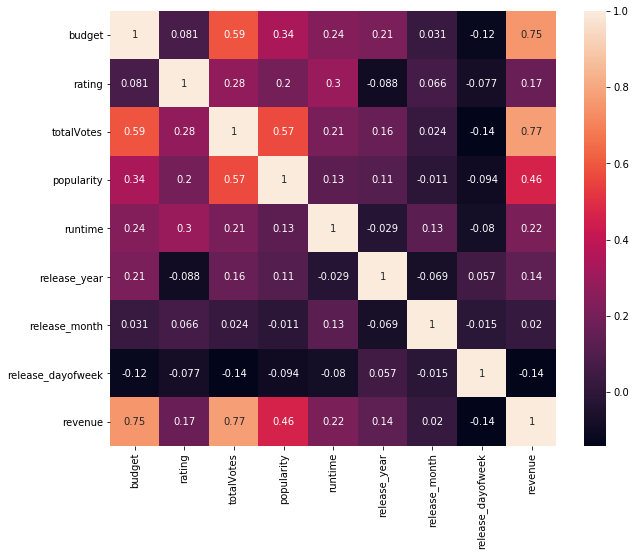

In [170]:
train = train[['budget', 'rating', 'totalVotes', 'popularity', 'runtime',
              'release_year', 'release_month', 'release_dayofweek',
              'revenue']]
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)
plt.show()

# Feature Engineering & Prediction
I am using two external datasets.

1) TMDB Competition Additional Features: This dataset contain rating & number of votes of a movie.

2) TMDB Competition Additional Training Data: This dataset contain around 2,000 additional rows, which I am using for training the data.

I am also manually fixing the budget & revenue of some rows below. Let me know, if any part is not clear.

In [171]:
def prepare(df):
    global json_cols
    global train_dict
    
    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/', expand=True).replace(np.nan, 0).astype(int)
    df.loc[(df['release_year'] <= 19) & (df['release_year'] < 100), 'release_year'] += 2000
    df.loc[(df['release_year'] > 19) & (df['release_year'] < 100), 'release_year'] += 1900
    
    releaseDate = pd.to_datetime(df['release_date'])
    df['release_dayofweek'] = releaseDate.dt.dayofweek
    df['release_quarter'] = releaseDate.dt.quarter
    
    rating_na = df.groupby(['release_year', 'original_language'])['rating'].mean().reset_index()
    df[df.rating.isna()]['rating'] = df.merge(rating_na, how = 'left', on = ['release_year', 'original_language'])
    vote_count_na = df.groupby(['release_year', 'original_language'])['totalVotes'].mean().reset_index()
    df[df.totalVotes.isna()]['totalVotes'] = df.merge(vote_count_na, how='left', on = ['release_year', 'original_language'])
    
    df['weightedRating'] = (df['rating']*df['totalVotes'] + 6.367 *1000) / (df['totalVotes'] + 1000)
    
    df['originalBudget'] = df['budget']
    df['inflationBudget'] = df['budget'] + df['budget']*1.8/100*(2018-df['release_year'])
    df['budget'] = np.log1p(df['budget'])
    
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender']==2]))
    df['_collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
    le = LabelEncoder()
    le.fit(list(df['_collection_name'].fillna('')))
    df['_collection_name'] = le.transform(df['_collection_name'].fillna('').astype(str))
    df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
    df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)
    
    df['_popularity_mean_year'] = df['popularity'] / df.groupby('release_year')['popularity'].transform('mean')
    df['_budget_runtime_ratio'] = df['budget']/df['runtime']
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/df['release_year']*df['release_year']
    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']
    df['_popularity_totalVotes_ratio'] = df['totalVotes']/df['popularity']
    df['_rating_popularity_ratio'] = df['rating']/df['popularity']
    df['_rating_totalVotes_ratio'] = df['totalVotes']/df['rating']
    df['_totalVotes_releaseYear_ratio'] = df['totalVotes']/df['release_year']
    df['_budget_rating_ratio'] = df['budget']/df['rating']
    df['_runtime_rating_ratio'] = df['runtime']/df['rating']
    df['_budget_totalVotes_ratio'] = df['budget']/df['totalVotes']
    
    df['has_homepage'] = 1
    df.loc[pd.isnull(df['homepage']), 'has_homepage'] = 0
    
    df['isbelongs_to_collection'] = 1
    df.loc[pd.isnull(df['belongs_to_collection']), 'isbelongs_to_collection'] = 0
    
    df['isTagline'] = 1
    df.loc[pd.isnull(df['tagline']), 'isTagline'] = 0
    
    df['isOriginalLanguageEng'] = 0
    df.loc[df['original_language'] == 'en', 'isOriginalLanguageEng'] = 1
    
    df['isTitleDifferent'] = 1
    df.loc[df['original_title'] == df['title'], 'isTitleDifferent'] = 0
    
    df['isMovieReleased'] = 1
    df.loc[df['status'] != 'Released', 'isMovieReleased'] = 0
    
    df['collection_id'] = df['belongs_to_collection'].apply(lambda x: np.nan if len(x)==0 else x[0]['id'])
    
    df['original_title_letter_count'] = df['original_title'].str.len()
    df['original_title_word_count'] = df['original_title'].str.split().str.len()
    
    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    df['production_countries_count'] = df['production_countries'].apply(lambda x: len(x))
    df['production_companies_count'] = df['production_companies'].apply(lambda x: len(x))
    
    df['cast_count'] = df['cast'].apply(lambda x : len(x))
    df['crew_count'] = df['crew'].apply(lambda x : len(x))
    
    df['meanruntimeByYear'] = df.groupby('release_year')['runtime'].transform('mean')
    df['meanPopularityByYear'] = df.groupby('release_year')['popularity'].transform('mean')
    df['meanBudgetByYear'] = df.groupby('release_year')['budget'].transform('mean')
    df['meantotalVotesByYear'] = df.groupby("release_year")["totalVotes"].transform('mean')
    df['meanTotalVotesByRating'] = df.groupby("rating")["totalVotes"].transform('mean')
    df['medianBudgetByYear'] = df.groupby("release_year")["budget"].transform('median')
    
    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1)
    df.drop(['genres_etc'], axis = 1, inplace = True)
    
    df = df.drop(['id', 'revenue','belongs_to_collection','genres','homepage','imdb_id','overview','runtime'
    ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
    ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id'
    ],axis=1)
    
    df.fillna(value=0.0, inplace = True) 

    return df

In [172]:
train = pd.read_csv('train.csv')
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [173]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [174]:
test = pd.read_csv('test.csv')
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [175]:
#Clean Data
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30


test['revenue'] = np.nan

In [176]:
train = pd.merge(train, pd.read_csv('TrainAdditionalFeatures.csv'), 
                 how='left', on=['imdb_id'])
test = pd.merge(test, pd.read_csv('TestAdditionalFeatures.csv'), 
               how = 'left', on=['imdb_id'])

additionalTrainData = pd.read_csv('additionalTrainData.csv')
additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
train = pd.concat([train, additionalTrainData])

print(train.columns)
print(train.shape)

train['revenue'] = np.log1p(train['revenue'])
y = train['revenue'].values

json_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

for col in tqdm(json_cols + ['belongs_to_collection']) :
    train[col] = train[col].apply(lambda x : get_dictionary(x))
    test[col] = test[col].apply(lambda x : get_dictionary(x))
    
def get_json_dict(df) :
    global json_cols
    result = dict()
    for e_col in json_cols :
        d = dict()
        rows = df[e_col].values
        for row in rows :
            if row is None : continue
            for i in row :
                if i['name'] not in d :
                    d[i['name']] = 0
                d[i['name']] += 1
        result[e_col] = d
    return result

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)


Index(['Keywords', 'belongs_to_collection', 'budget', 'cast', 'crew', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'popularity2', 'poster_path',
       'production_companies', 'production_countries', 'rating',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'totalVotes'],
      dtype='object')
(5001, 26)


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:15<00:00,  1.89s/it]


In [177]:
# remove category with bias and low frequency

for col in json_cols:
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))
    
    remove += list(train_id - test_id) + list(test_id - train_id)
    
    for i in train_id.union(test_id) - set(remove):
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
            
    for i in remove:
        if i in train_dict[col]:
            del train_dict[col][i]
        if i in test_dict[col]:
            del test_dict[col][i]

all_data = prepare(pd.concat([train, test]).reset_index(drop = True))

train = all_data.loc[:train.shape[0] - 1, :]
test = all_data.loc[train.shape[0]:,:]

# Models

XGBoost

In [178]:
from sklearn.model_selection import KFold

random_seed = 2019
k = 10
fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
np.random.seed(random_seed)

In [179]:
import xgboost as xgb

def xgb_model(trn_x, trn_y, val_x, val_y, test, verbose):
    
    params = {'objective': 'reg:linear',
             'eta' : 0.01,
             'max_depth' : 6,
             'subsample' : 0.6,
             'colsample_bytree' : 0.7,
             'eval_metric' : 'rmse',
             'seed' : random_seed,
             'silent' : True}
    
    record = dict()
    model = xgb.train(params, xgb.DMatrix(trn_x, trn_y), 100000,
                     [(xgb.DMatrix(trn_x, trn_y), 'train'),
                     (xgb.DMatrix(val_x, val_y), 'valid')],
                      verbose_eval = verbose,
                      early_stopping_rounds = 500,
                      callbacks = [xgb.callback.record_evaluation(record)])
    
    best_idx = np.argmin(np.array(record['valid']['rmse']))
    
    val_pred = model.predict(xgb.DMatrix(val_x), ntree_limit=model.best_ntree_limit)
    test_pred = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit)
    
    return {'val':val_pred, 'test':test_pred, 
            'error':record['valid']['rmse'][best_idx], 'importance': [i for k, i in model.get_score().items()]}

LightGBM

In [180]:
import lightgbm as lgb

def lgb_model(trn_x, trn_y, val_x, val_y, test, verbose):
    
    params = {'objective':'regression',
             'num_leaves': 30,
             'min_data_in_leaf':20,
             'max_depth': 9,
             'learning_rate': 0.004,
             'feature_fraction':0.9,
             'bagging_freq':1,
             'bagging_fraction':0.9,
             'lambda_l1':0.2,
             'bagging_seed':random_seed,
             'metric':'rmse',
             'random_state':random_seed,
             'verbosity': -1,
             'num_threads' : 8}
    
    record = dict()
    model = lgb.train(params, lgb.Dataset(trn_x, trn_y),
                     num_boost_round = 100000,
                     valid_sets = [(lgb.Dataset(val_x, val_y))],
                     verbose_eval = verbose,
                     early_stopping_rounds=500,
                     callbacks = [lgb.record_evaluation(record)])
    
    best_idx = np.argmin(np.array(record['valid_0']['rmse']))
    
    val_pred = model.predict(val_x, num_iteration = model.best_iteration)
    test_pred = model.predict(test, num_iteration = model.best_iteration)
    
    return {'val':val_pred, 'test':test_pred, 'error':record['valid_0']['rmse'][best_idx], 'importance':model.feature_importance('gain')}

CatBoost

In [181]:
from catboost import CatBoostRegressor

def cat_model(trn_x, trn_y, val_x, val_y, test, verbose):
    
    model = CatBoostRegressor(iterations=100000,
                             learning_rate=0.004,
                             depth=5,
                             eval_metric='RMSE',
                             colsample_bylevel=0.8,
                             random_seed=random_seed,
                             bagging_temperature = 0.2,
                             metric_period=None,
                             early_stopping_rounds=200, 
                             thread_count=8)
    
    model.fit(trn_x, trn_y, eval_set=[(val_x, val_y)],
              use_best_model = True, verbose=False)
    
    val_pred = model.predict(val_x)
    test_pred = model.predict(test)
    
    return {'val':val_pred, 'test':test_pred, 'error':model.get_best_score()['validation_0']['RMSE'],
            'importance' : model.get_feature_importance()}

In [182]:
result_dict = dict()

val_pred = np.zeros(train.shape[0])
test_pred = np.zeros(test.shape[0])
final_err = 0
verbose = False

for i, (trn, val) in enumerate(fold):
    print(i + 1, 'fold')
    
    trn_x = train.loc[trn, :]
    trn_y = y[trn]
    val_x = train.loc[val, :]
    val_y = y[val]
    
    fold_val_pred = np.zeros(val_x.shape[0])
    fold_test_pred = np.zeros(test.shape[0])
    fold_err = []
    
    # xgboost
    start = datetime.now()
    result = xgb_model(trn_x, trn_y, val_x, val_y, test,verbose)
    
    fold_val_pred += result['val']*0.2
    fold_test_pred += result['test']*0.2
    fold_err.append(result['error'])
    print('xgb model : ', result['error'], str(int((datetime.now()-start).seconds/60)) + 'm')
    
    # lightgbm
    
    start = datetime.now()
    result = lgb_model(trn_x, trn_y, val_x, val_y, test, verbose)
    
    fold_val_pred += result['val']*0.4
    fold_test_pred += result['test']*0.4
    fold_err.append(result['error'])
    print('lgb model : ', result['error'], str(int((datetime.now()-start).seconds/60)) + 'm')
    
    # catboost
    
    start = datetime.now()
    result = cat_model(trn_x, trn_y, val_x, val_y, test, verbose)
    
    fold_val_pred += result['val']*0.4
    fold_test_pred += result['test']*0.4
    fold_err.append(result['error'])
    print('cat model : ', result['error'], str(int((datetime.now()-start).seconds/60)) + 'm')
    
    # mix results of multiple models
    
    val_pred[val] += fold_val_pred
    
    test_pred += fold_test_pred / k
    
    final_err += (sum(fold_err) / len(fold_err)) / k
    
    print("-"*50)
    print("avg error : ", sum(fold_err)/len(fold_err))
    print('blend error : ', np.sqrt(mean_squared_error(val_y, fold_val_pred)))
    
    print("-"*50)
    
print('final avg error : ', final_err)
print('final blend error : ', np.sqrt(mean_squared_error(y, val_pred)))

1 fold
xgb model :  2.422564 0m
lgb model :  2.437355668084678 0m
cat model :  2.3690688602021908 7m
--------------------------------------------------
avg error :  2.4096628427622897
blend error :  2.3832902275799976
--------------------------------------------------
2 fold
xgb model :  1.777795 0m
lgb model :  1.8096415554614937 0m
cat model :  1.8525132445057817 5m
--------------------------------------------------
avg error :  1.813316599989092
blend error :  1.7973018250652615
--------------------------------------------------
3 fold
xgb model :  2.273084 0m
lgb model :  2.292043024161937 0m
cat model :  2.3100166365418984 5m
--------------------------------------------------
avg error :  2.291714553567945
blend error :  2.2730345333141626
--------------------------------------------------
4 fold
xgb model :  1.877009 0m
lgb model :  1.840074144904618 0m
cat model :  1.8216898678934554 8m
--------------------------------------------------
avg error :  1.846257670932691
blend error

In [186]:
sub = pd.read_csv('sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(test_pred)
print(df_sub['revenue'])
df_sub.to_csv("submission_baseline.csv", index=False)

0       8.974392e+06
1       2.086564e+06
2       6.954263e+06
3       1.094662e+07
4       1.205833e+06
5       1.868271e+06
6       1.266636e+06
7       2.680268e+07
8       2.462687e+07
9       4.960173e+08
10      4.847699e+05
11      2.678745e+05
12      1.999126e+07
13      5.873544e+05
14      2.106453e+07
15      2.290604e+05
16      1.124124e+08
17      1.815747e+08
18      1.124622e+07
19      4.741463e+08
20      3.249027e+07
21      2.894829e+07
22      3.722547e+04
23      8.108445e+06
24      1.810631e+05
25      9.250036e+07
26      4.458877e+06
27      1.211899e+08
28      3.703181e+05
29      9.485633e+06
            ...     
4368    1.199271e+07
4369    2.921329e+07
4370    2.212664e+05
4371    7.590448e+07
4372    3.134250e+08
4373    2.840726e+07
4374    6.735602e+07
4375    1.187367e+05
4376    1.144459e+07
4377    5.311015e+06
4378    1.065463e+08
4379    3.488266e+06
4380    2.588673e+06
4381    2.453735e+06
4382    4.346464e+05
4383    1.055439e+07
4384    3.011